In [1]:
%matplotlib inline

import json
import numpy as np
import matplotlib.pyplot as plt
import os
plt.style.use('ggplot')

In [2]:
overall = {}

for obj_num in os.listdir("new_proposed/"):
    if os.path.isdir("new_proposed/"+obj_num):
        for group in os.listdir("new_proposed/"+obj_num):
            if group != "4":
                if obj_num+"_"+group not in overall.keys():
                    overall[obj_num+"_"+group] = {}
                for folder in os.listdir("new_proposed/"+obj_num+"/"+group):
                    if folder not in overall[obj_num+"_"+group].keys():
                        overall[obj_num+"_"+group][folder] = []
                    if len(folder.split("_")) == 2 and folder.split("_")[1] == "two":
                        for filename in os.listdir("new_proposed/"+obj_num+"/"+group+"/"+folder+"/"):
                            if filename.split("_")[1][0] == "6":
                                with open("new_proposed/" + obj_num+"/"+group+"/"+folder+"/"+filename, 'r') as f:
                                    dic = json.load(f)
                                overall[obj_num+"_"+group][folder].append((dic['mean separation after push'] - dic['mean separation before push']))
                    else:
                        for filename in os.listdir("new_proposed/"+obj_num+"/"+group+"/"+folder+"/"):
                            with open("new_proposed/" + obj_num+"/"+group+"/"+folder+"/"+filename, 'r') as f:
                                dic = json.load(f)
                            overall[obj_num+"_"+group][folder].append((dic['mean separation after push'] - dic['mean separation before push']))
                            

In [3]:
for obj_num in os.listdir("new_proposed/"):
    if os.path.isdir("new_proposed/"+obj_num):
        for group in os.listdir("new_proposed/"+obj_num):
            if group != "4":
                optimal = {}
                for filename in os.listdir("new_proposed/"+obj_num+"/"+group+"/distribution_stable"):
                    try:
                        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                            continue
                        with open("new_proposed/"+obj_num+"/"+group+"/distribution_stable/"+filename, 'r') as f:
                            dic = json.load(f)
                        key = filename.split("_")[0]
                        if not key in optimal.keys():
                            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
                        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
                            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
                    except:
                        continue
                optimal_final = [optimal[key][0] for key in optimal.keys()]
                overall[obj_num+"_"+group]["opt_mean"] = np.mean(optimal_final)

In [ ]:
for obj_num in os.listdir("new_proposed/"):
    if os.path.isdir("new_proposed/"+obj_num):
        for group in os.listdir("new_proposed/"+obj_num):
            if group != "4":
                optimal = {}
                for filename in os.listdir("new_proposed/"+obj_num+"/"+group+"/distribution_stable_two"):
                    try:
                        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                            continue
                        with open("new_proposed/"+obj_num+"/"+group+"/distribution_stable_two/"+filename, 'r') as f:
                            dic = json.load(f)
                        key = filename.split("_")[0]
                        if not key in optimal.keys():
                            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
                        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
                            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
                    except:
                        continue
                optimal_final = [optimal[key][0] for key in optimal.keys()]
                overall[obj_num+"_"+group]["opt_mean_two"] = np.mean(optimal_final)

In [4]:
single_point_heatmap = {}
for config in overall.keys():
    single_point_heatmap[config] = [np.mean(overall[config]["proposed9"])/overall[config]["opt_mean"], (np.mean(overall[config]["proposed9"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])]
    print(config, np.mean(overall[config]["proposed9"]), overall[config]["opt_mean"], np.mean(overall[config]["proposed9"])/overall[config]["opt_mean"])
    

7_0 6.37979175466266 7.097018160757125 0.898939753309304
7_1 6.031750234456116 7.129630384952722 0.846011631568768
7_3 5.267379169219636 6.8519729875161985 0.7687390447709618
7_2 5.853117328095427 7.03692568555033 0.831771939856386
6_0 5.009982631080371 5.6877088852079885 0.8808437161947268
6_1 5.230704992790814 5.891036393308907 0.8879091289831271
6_3 4.7582989383858525 5.791958299383333 0.8215354276449929
6_2 4.848508123283498 5.738686897966974 0.8448811042472387
8_0 7.206195106908055 8.196120955657241 0.8792202001282198
4_0 2.884930614522678 3.204204595824279 0.9003578043306975
4_1 2.960705208880419 3.2785129187802062 0.9030634565813974
4_3 2.486711533024072 3.3316247961462153 0.7463960335210981
4_2 2.654742053582808 3.267908560979791 0.812367299771343
3_0 2.0012542021548314 2.105383869352014 0.9505412439446345
3_1 2.07141210764287 2.1866192940612454 0.9473126452641882
3_3 1.7935584299134757 2.2545048233890905 0.7955442859586808
3_2 2.0458943648218018 2.258415002050855 0.90589832380

In [ ]:
cluster_point_heatmap = {}
for config in overall.keys():
    cluster_point_heatmap[config] = [np.mean(overall[config]["clusterDiffusion"])/overall[config]["opt_mean"], (np.mean(overall[config]["clusterDiffusion"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])]
    print(config, np.mean(overall[config]["clusterDiffusion"]), overall[config]["opt_mean"], np.mean(overall[config]["clusterDiffusion"])/overall[config]["opt_mean"])
    

In [ ]:
diff = []
for config in overall.keys():
    if int(config.split("_")[0]) > 6:
        diff.append((single_point_heatmap[config][0] - cluster_point_heatmap[config][0])/cluster_point_heatmap[config][0])
np.mean(diff)

In [5]:
area_point_heatmap = {}
for config in overall.keys():
    area_point_heatmap[config] = [np.mean(overall[config]["proposed9_area"])/overall[config]["opt_mean"], (np.mean(overall[config]["proposed9_area"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])]
    print(config, [np.mean(overall[config]["proposed9_area"])/overall[config]["opt_mean"], (np.mean(overall[config]["proposed9_area"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])])
    

7_0 [0.9111982496294908, 1.470898914030863]
7_1 [0.8941574792076296, 1.3704808330170093]
7_3 [0.8691122849515028, 1.3671847258699337]
7_2 [0.888457396706946, 1.3598800064068863]
6_0 [0.9106103202336474, 1.3345836592720777]
6_1 [0.9188869859267635, 1.3538002478352715]
6_3 [0.8833296988186489, 1.3045775125600836]
6_2 [0.8993908137695714, 1.26013788354868]
8_0 [0.8885863944523295, 1.4083977581740879]
4_0 [0.9097604929655682, 0.9030807322853779]
4_1 [0.9266706038524918, 0.9826778107264671]
4_3 [0.82728921869799, 0.8680651299899255]
4_2 [0.8828264887022891, 0.8642953684049023]
3_0 [0.9628258569862944, 0.9886862751815029]
3_1 [0.967244316319207, 1.0049568862922547]
3_3 [0.9132184098355838, 1.0095176147226594]
3_2 [0.9493088139666592, 1.0201824922760083]
5_0 [0.9535401865816353, 1.35906157492466]
5_1 [0.9554187777729718, 1.3150287340829672]
5_3 [0.8708971582732987, 1.0998559164518547]
5_2 [0.9288264541920367, 1.220608125724045]


In [ ]:
cluster_area_point_heatmap = {}
for config in overall.keys():
    cluster_area_point_heatmap[config] = [np.mean(overall[config]["clusterDiffusion_area"])/overall[config]["opt_mean"], (np.mean(overall[config]["clusterDiffusion_area"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])]
    print(config, [np.mean(overall[config]["clusterDiffusion_area"])/overall[config]["opt_mean"], (np.mean(overall[config]["clusterDiffusion_area"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])])
    

In [6]:
two_points_heatmap = {}
for config in overall.keys():
    two_points_heatmap[config] = [np.mean(overall[config]["proposed9_two"])/overall[config]["opt_mean"], (np.mean(overall[config]["proposed9_two"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])]
    print(config, [np.mean(overall[config]["proposed9_two"])/overall[config]["opt_mean"], (np.mean(overall[config]["proposed9_two"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])])

7_0 [0.8994299673046939, 1.4276387576089815]
7_1 [0.8935799999554107, 1.3684952627297384]
7_3 [0.8622190261655125, 1.3483103576429074]
7_2 [0.8821237799477322, 1.34057224358054]
6_0 [0.8995873881559544, 1.2935152346280672]
6_1 [0.91095245234198, 1.3271067144030493]
6_3 [0.8691898346732554, 1.2659530363388232]
6_2 [0.8900915125062936, 1.2328886891206694]
8_0 [0.8910516477284587, 1.4169714115840144]
4_0 [0.8999283704403646, 0.8695657108857727]
4_1 [0.920015086468572, 0.961611467316227]
4_3 [0.862521465526003, 0.9570158410282281]
4_2 [0.8832203516957973, 0.8654069924589299]
3_0 [0.9619075060090041, 0.9858159993687761]
3_1 [0.9693345663425796, 1.0113675776329394]
3_3 [0.928217230279744, 1.0457890434281851]
3_2 [0.9575764746187705, 1.044071249155476]
5_0 [0.9449717146353064, 1.326805333381282]
5_1 [0.9406716536442598, 1.263961010142117]
5_3 [0.8798712092383421, 1.1239054028934972]
5_2 [0.9244151939628308, 1.2068222787334548]


In [ ]:
cluster_two_points_heatmap = {}
for config in overall.keys():
    cluster_two_points_heatmap[config] = [np.mean(overall[config]["clusterDiffusion_two"])/overall[config]["opt_mean"], (np.mean(overall[config]["clusterDiffusion_two"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])]
    print(config, [np.mean(overall[config]["clusterDiffusion_two"])/overall[config]["opt_mean"], (np.mean(overall[config]["clusterDiffusion_two"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])])

In [ ]:
groups = ["disk", "semi-disk", "semi-slice", "slice"]
num_objs = ["3 objects", "4 objects", "5 objects", "6 objects", "7 objects"]



In [ ]:
import matplotlib
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels
                     for the rows
        col_labels : A list or array of length M with the labels
                     for the columns
    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
#     cbar = None
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
#     ax.tick_params(top=True, bottom=False,
#                    labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Arguments:
        im         : The AxesImage to be labeled.
    Optional arguments:
        data       : Data used to annotate. If None, the image's data is used.
        valfmt     : The format of the annotations inside the heatmap.
                     This should either use the string format method, e.g.
                     "$ {x:.2f}", or be a :class:`matplotlib.ticker.Formatter`.
        textcolors : A list or array of two color specifications. The first is
                     used for values below a threshold, the second for those
                     above.
        threshold  : Value in data units according to which the colors from
                     textcolors are applied. If None (the default) uses the
                     middle of the colormap as separation.

    Further arguments are passed on to the created text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [ ]:
values = np.zeros([4, 5])
for config in single_point_heatmap.keys():
    g = config.split("_")[1]
    n = config.split("_")[0]
    values[int(g)][int(n) - 3] = single_point_heatmap[config][0]

fig, ax = plt.subplots()

im, cbar = heatmap(values, groups, num_objs, ax=ax,
                   cmap="magma_r", cbarlabel="performance",vmin=0.65, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.3f}")

fig.tight_layout()
plt.title("Single point ClusterPush2D")
plt.show()

In [ ]:
values = np.zeros([4, 5])
for config in area_point_heatmap.keys():
    g = config.split("_")[1]
    n = config.split("_")[0]
    values[int(g)][int(n) - 3] = area_point_heatmap[config][0]

fig, ax = plt.subplots()

im, cbar = heatmap(values, groups, num_objs, ax=ax,
                   cmap="magma_r", cbarlabel="performance",vmin=0.65, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.3f}")

fig.tight_layout()
plt.title("Area push ClusterPush2D")
plt.show()

In [ ]:
values = np.zeros([4, 5])
for config in two_points_heatmap.keys():
    g = config.split("_")[1]
    n = config.split("_")[0]
    values[int(g)][int(n) - 3] = two_points_heatmap[config][0]

fig, ax = plt.subplots()

im, cbar = heatmap(values, groups, num_objs, ax=ax,
                   cmap="magma_r", cbarlabel="performance",vmin=0.65, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.3f}")

fig.tight_layout()
plt.title("Two points ClusterPush2D")
plt.show()

In [ ]:
random_heatmap = {}
for config in overall.keys():
    random_heatmap[config] = [np.mean(overall[config]["distribution_stable"])/overall[config]["opt_mean"], (np.mean(overall[config]["distribution_stable"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])]
    print(config, [np.mean(overall[config]["distribution_stable"])/overall[config]["opt_mean"], (np.mean(overall[config]["distribution_stable"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])])
    

In [ ]:
values = np.zeros([4, 5])
for config in random_heatmap.keys():
    g = config.split("_")[1]
    n = config.split("_")[0]
    values[int(g)][int(n) - 3] = random_heatmap[config][0]

fig, ax = plt.subplots()

im, cbar = heatmap(values, groups, num_objs, ax=ax,
                   cmap="magma_r", cbarlabel="performance",vmin=0.35, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.3f}")

fig.tight_layout()
plt.title("Quasi-random relative to Brute Force")
plt.show()

In [ ]:
values = np.zeros([4, 5])
for config in single_point_heatmap.keys():
    g = config.split("_")[1]
    n = config.split("_")[0]
    values[int(g)][int(n) - 3] = cluster_point_heatmap[config][0]

fig, ax = plt.subplots()

im, cbar = heatmap(values, groups, num_objs, ax=ax,
                   cmap="magma_r", cbarlabel="performance",vmin=0.35, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.3f}")

fig.tight_layout()
plt.title("Single point Cluster Diffusion relative to Brute Force")
plt.show()

In [ ]:
values = np.zeros([4, 5])
for config in area_point_heatmap.keys():
    g = config.split("_")[1]
    n = config.split("_")[0]
    values[int(g)][int(n) - 3] = cluster_area_point_heatmap[config][0]

fig, ax = plt.subplots()

im, cbar = heatmap(values, groups, num_objs, ax=ax,
                   cmap="magma_r", cbarlabel="performance",vmin=0.35, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.3f}")

fig.tight_layout()
plt.title("Area push Cluster Diffusion relative to Brute Force")
plt.show()

In [ ]:
values = np.zeros([4, 5])
for config in two_points_heatmap.keys():
    g = config.split("_")[1]
    n = config.split("_")[0]
    values[int(g)][int(n) - 3] = cluster_two_points_heatmap[config][0]

fig, ax = plt.subplots()

im, cbar = heatmap(values, groups, num_objs, ax=ax,
                   cmap="magma_r", cbarlabel="performance",vmin=0.35, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.3f}")

fig.tight_layout()
plt.title("Two points Cluster Diffusion relative to Brute Force")
plt.show()

In [ ]:
two_point_bruteforce_heatmap = {}
for config in overall.keys():
    two_point_bruteforce_heatmap[config] = [np.mean(overall[config]["distribution_stable_two"])/overall[config]["opt_mean"], (np.mean(overall[config]["distribution_stable_two"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])]
    print(config, np.mean(overall[config]["distribution_stable_two"]), overall[config]["opt_mean"], np.mean(overall[config]["distribution_stable_two"])/overall[config]["opt_mean"])
    

In [ ]:
values = np.zeros([4, 5])
for config in two_point_bruteforce_heatmap.keys():
    g = config.split("_")[1]
    n = config.split("_")[0]
    values[int(g)][int(n) - 3] = two_point_bruteforce_heatmap[config][0]

fig, ax = plt.subplots()

im, cbar = heatmap(values, groups, num_objs, ax=ax,
                   cmap="magma_r", cbarlabel="performance as a ratio of Brute Force",vmin=0.35, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.3f}")

fig.tight_layout()
plt.title("Two points Quasi-Random relative to Brute Force")
plt.show()

In [ ]:
area_random_heatmap = {}
for config in overall.keys():
    area_random_heatmap[config] = [np.mean(overall[config]["distribution_stable_area"])/overall[config]["opt_mean"], (np.mean(overall[config]["distribution_stable_area"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])]
    print(config, np.mean(overall[config]["distribution_stable_area"]), overall[config]["opt_mean"], np.mean(overall[config]["distribution_stable_area"])/overall[config]["opt_mean"])
    

In [ ]:
values = np.zeros([4, 5])
for config in area_random_heatmap.keys():
    g = config.split("_")[1]
    n = config.split("_")[0]
    values[int(g)][int(n) - 3] = area_random_heatmap[config][0]

fig, ax = plt.subplots()

im, cbar = heatmap(values, groups, num_objs, ax=ax,
                   cmap="magma_r", cbarlabel="performance as a ratio of Brute Force",vmin=0.35, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.3f}")

fig.tight_layout()
plt.title("Area Quasi-Random relative to Brute Force")
plt.show()

In [ ]:
for config in overall.keys():
    diff_two = []
    diff_area = []
    for i in range(len(overall[config]["proposed9_two"])):
#         print(i, overall[config]["proposed9_two"][i] - overall[config]["proposed9"][i], overall[config]["proposed9_area"][i] - overall[config]["proposed9"][i])
        diff_two.append(overall[config]["proposed9_two"][i] - overall[config]["proposed9"][i])
        diff_area.append(overall[config]["proposed9_area"][i] - overall[config]["proposed9"][i])
    print(config, np.mean(diff_two) + 2* np.std(diff_two), np.mean(diff_two) - 2* np.std(diff_two), np.mean(diff_area) + 2* np.std(diff_area), np.mean(diff_area) - 2* np.std(diff_area))
    
        

In [7]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']

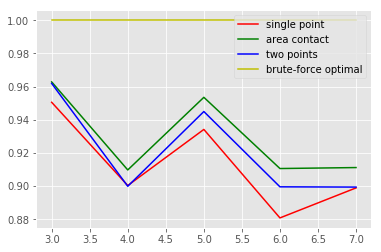

In [19]:
plt.figure()
i = 0
group = str(0)
single = []
area = []
two = []
for j in range(3, 8):
    single.append(single_point_heatmap[str(j)+"_"+group][0])
    area.append(area_point_heatmap[str(j)+"_"+group][0])
    two.append(two_points_heatmap[str(j)+"_"+group][0])
    
plt.plot(range(3, 8), single, color=colors[i], label="single point")
i+=1
plt.plot(range(3, 8), area, color=colors[i], label="area contact")
i+=1
plt.plot(range(3, 8), two, color=colors[i], label="two points")
i+=1
plt.plot(range(3, 8), np.ones((5,)), color=colors[i], label="brute-force optimal")
i+=1

plt.legend(loc="upper right")


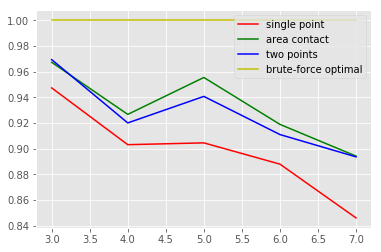

In [20]:
plt.figure()
i = 0
group = str(1)
single = []
area = []
two = []
for j in range(3, 8):
    single.append(single_point_heatmap[str(j)+"_"+group][0])
    area.append(area_point_heatmap[str(j)+"_"+group][0])
    two.append(two_points_heatmap[str(j)+"_"+group][0])
    
plt.plot(range(3, 8), single, color=colors[i], label="single point")
i+=1
plt.plot(range(3, 8), area, color=colors[i], label="area contact")
i+=1
plt.plot(range(3, 8), two, color=colors[i], label="two points")
i+=1
plt.plot(range(3, 8), np.ones((5,)), color=colors[i], label="brute-force optimal")
i+=1

plt.legend()

plt.legend(loc="upper right")

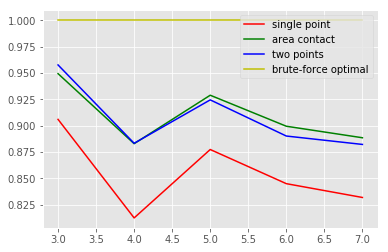

In [21]:
plt.figure()
i = 0
group = str(2)
single = []
area = []
two = []
for j in range(3, 8):
    single.append(single_point_heatmap[str(j)+"_"+group][0])
    area.append(area_point_heatmap[str(j)+"_"+group][0])
    two.append(two_points_heatmap[str(j)+"_"+group][0])
    
plt.plot(range(3, 8), single, color=colors[i], label="single point")
i+=1
plt.plot(range(3, 8), area, color=colors[i], label="area contact")
i+=1
plt.plot(range(3, 8), two, color=colors[i], label="two points")
i+=1
plt.plot(range(3, 8), np.ones((5,)), color=colors[i], label="brute-force optimal")
i+=1

plt.legend()

plt.legend(loc="upper right")

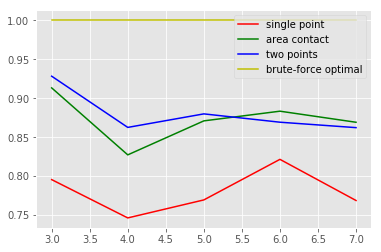

In [22]:
plt.figure()
i = 0
group = str(3)
single = []
area = []
two = []
for j in range(3, 8):
    single.append(single_point_heatmap[str(j)+"_"+group][0])
    area.append(area_point_heatmap[str(j)+"_"+group][0])
    two.append(two_points_heatmap[str(j)+"_"+group][0])
    
plt.plot(range(3, 8), single, color=colors[i], label="single point")
i+=1
plt.plot(range(3, 8), area, color=colors[i], label="area contact")
i+=1
plt.plot(range(3, 8), two, color=colors[i], label="two points")
i+=1
plt.plot(range(3, 8), np.ones((5,)), color=colors[i], label="brute-force optimal")
i+=1

plt.legend()

plt.legend(loc="upper right")